# EDA IN IRIS DATASET

### IRIS is a flower that is found to be in three different species namely
#### -->Iris setosa
#### -->Iris versicolor
#### -->Iris virginica

### We have four features naming 
#### ->sepal_length
#### ->sepal_width
#### ->petal_length
#### ->petal_width

### With help of these features we can classify the species We want to find the relation between the features and species.


### LETS IMPORT NECESSARY LIBRARIES USED FOR EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## LETS LOAD IRIS DATASET

In [2]:
df = sns.load_dataset('iris')

## LETS VIEW FIRST 5 ROWS

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Since i gonna use rawdataset later I create a copy of the dataset

In [4]:
data = df.copy()
data.shape

(150, 5)

### Lets view the column names

In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.info()
print('\n\n\n From the above info we know that there are no null values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



 From the above info we know that there are no null values


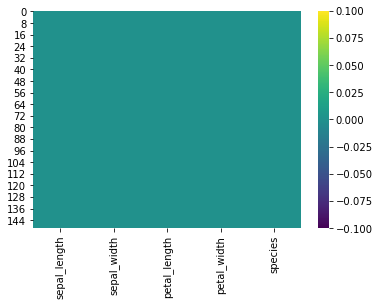

In [7]:
sns.heatmap(data.isnull(),cmap='viridis')


In [8]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### There are three species in iris

In [9]:
def inspect_data(data):
    return pd.DataFrame({'data_type' : data.dtypes, 'no_of_uniques': data.apply(lambda x : x.nunique(),axis = 0),
                                                                                'unique values':data.apply(lambda x:str(x.unique()),axis = 0),'mean' : np.mean(data)})
inspect_data(data)

,data_type,no_of_uniques,unique values,mean
petal_length,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...,3.758000
petal_width,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...,1.199333
sepal_length,float64,35,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...,5.843333
sepal_width,float64,23,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...,3.057333
species,object,3,['setosa' 'versicolor' 'virginica'],NaN


In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.duplicated().sum()

1

In [12]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


### Hence there is only one duplicate data lets ignore that

In [13]:
data.skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [14]:
data.kurt()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

### Lets convert catagorical column into numerical one

In [15]:
species = ['species']
def transform_y(x):
    return x.map({'setosa' : 0,'versicolor':1,'virginica' : 2})
data[species] = data[species].apply(transform_y)

In [16]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
data['species'].unique()

array([0, 1, 2], dtype=int64)

### Lets do some analysis

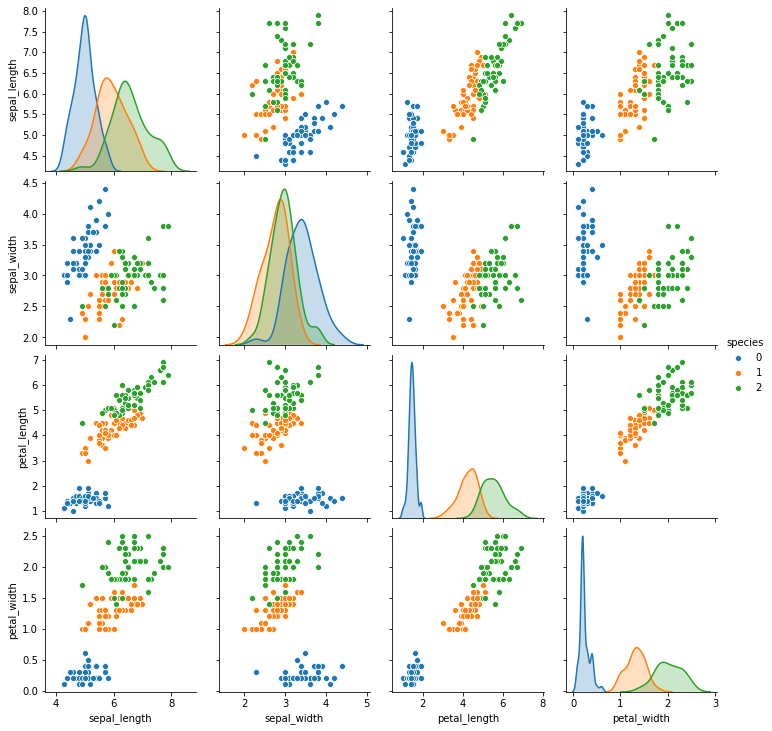

In [18]:
sns.pairplot(data,hue='species')

In [19]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


###### From above correlation we can analyse that sepal_width is negatively correlated

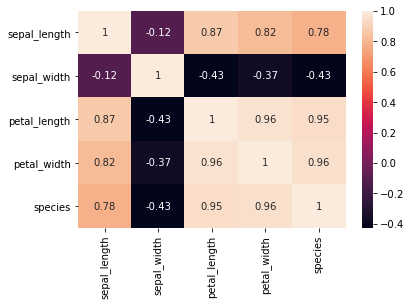

In [20]:
sns.heatmap(data.corr(),annot=True)

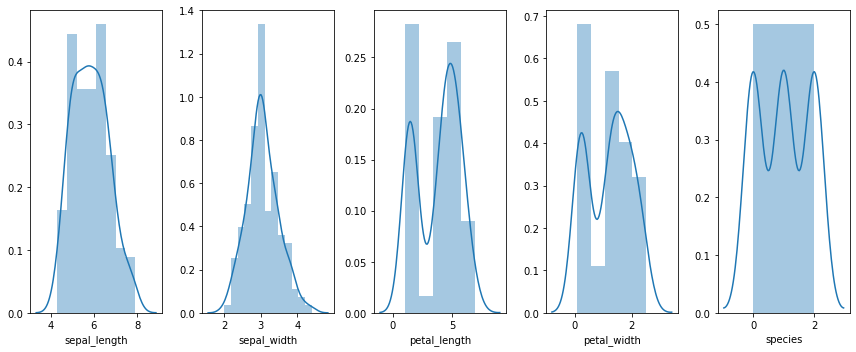

In [21]:
plt.figure(figsize=(12,5))
cols = ['sepal_length','sepal_width','petal_length','petal_width','species']
i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.distplot(data[col])
    i = i+1
plt.tight_layout()    
plt.show()

##### From above graphs we can see sepal_width is distributed normally

# Lets find some relation between species and features

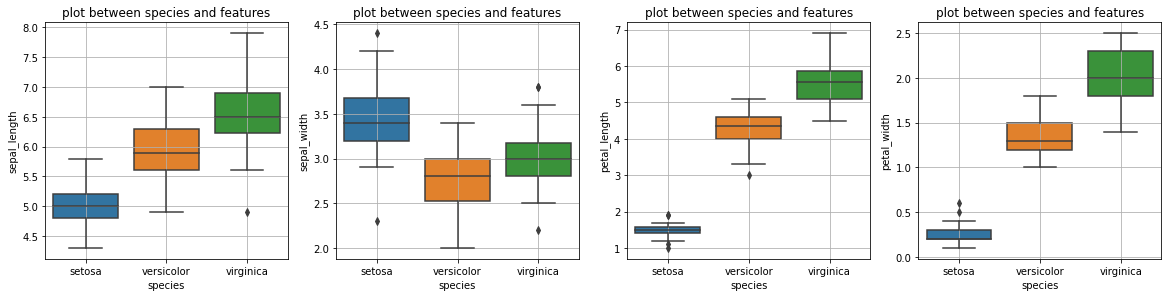

In [22]:

plt.figure(figsize=(20,20))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.boxplot(df['species'],df[col_1])
    plt.title('plot between species and features')
    plt.grid()
    i = i+1    
plt.show()

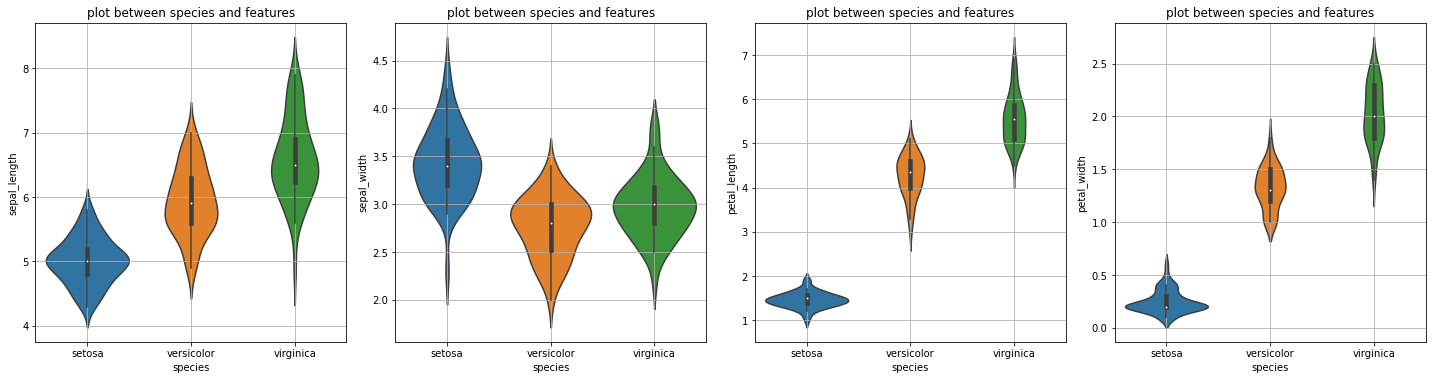

In [23]:
plt.figure(figsize=(20,20))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.violinplot(df['species'],data[col_1])
    plt.grid()
    plt.title('plot between species and features')
    i = i+1
plt.tight_layout()    
plt.show()

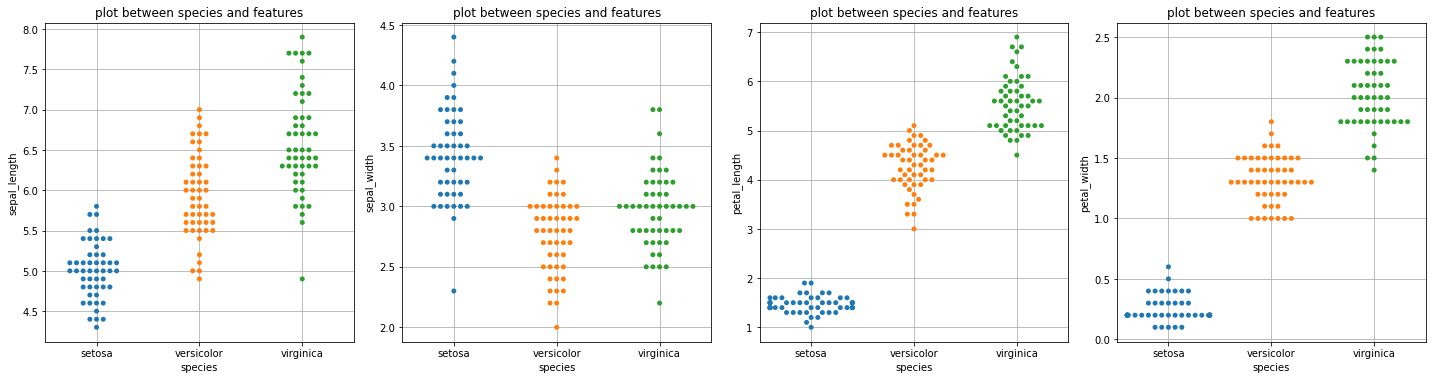

In [24]:
plt.figure(figsize=(20,20))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.swarmplot(df['species'],data[col_1])
    plt.grid()
    plt.title('plot between species and features')
    i = i+1
plt.tight_layout()    
plt.show()

### From above graphs its clear that setosa is a small flower.Virginica is large flower compared to other species

In [25]:
data_1 = df.copy()

In [26]:
data_1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
species = pd.get_dummies(df['species'])

In [28]:
data_1.drop(['species'],axis = 1,inplace=True)

In [29]:
data_1=pd.concat([data_1,species],axis = 1)

In [30]:
data_1.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### Lets find species wise relation with features

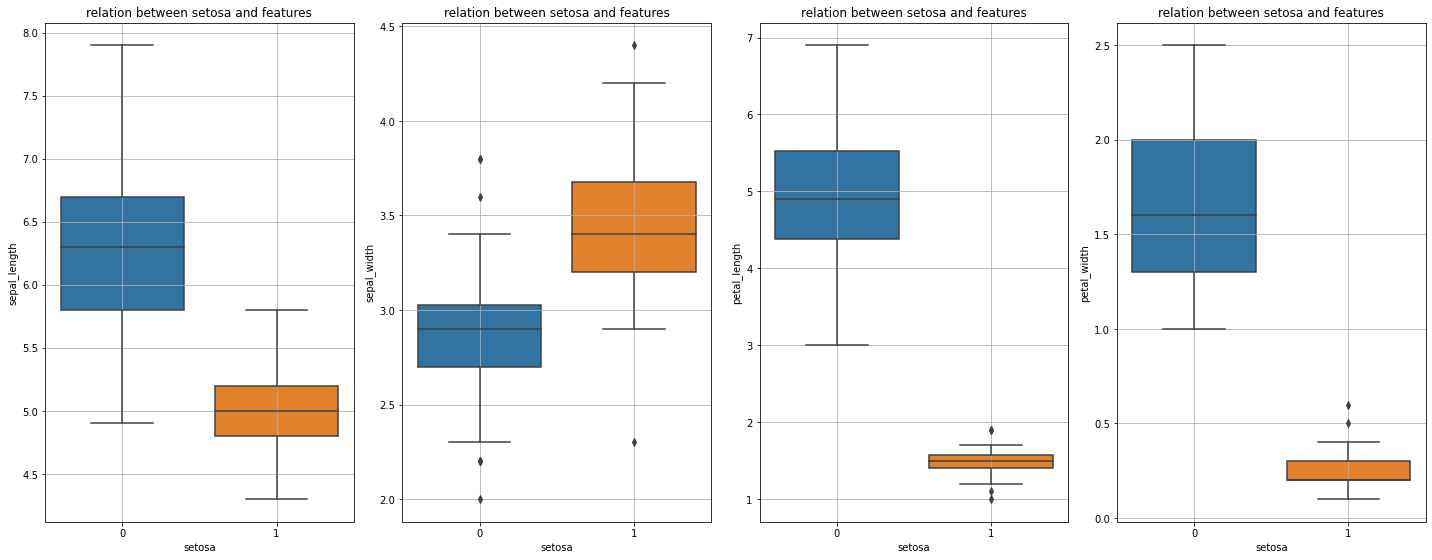

In [31]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.boxplot(data_1['setosa'],data_1[col_1])
    plt.title('relation between setosa and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

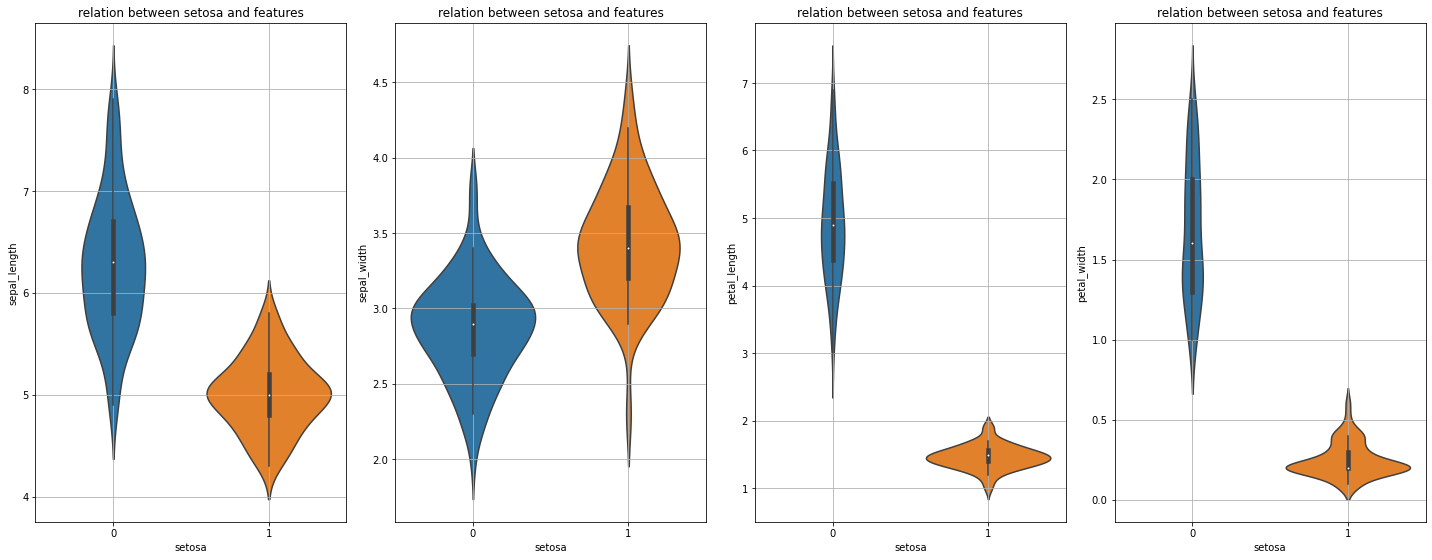

In [32]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.violinplot(data_1['setosa'],data_1[col_1])
    plt.title('relation between setosa and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

#### From above graphs show that Setosa flower has small (sepal_length,petal_length,petal_width) and large (sepal_width)
#### This shows that setosa is small flower with wider sepals

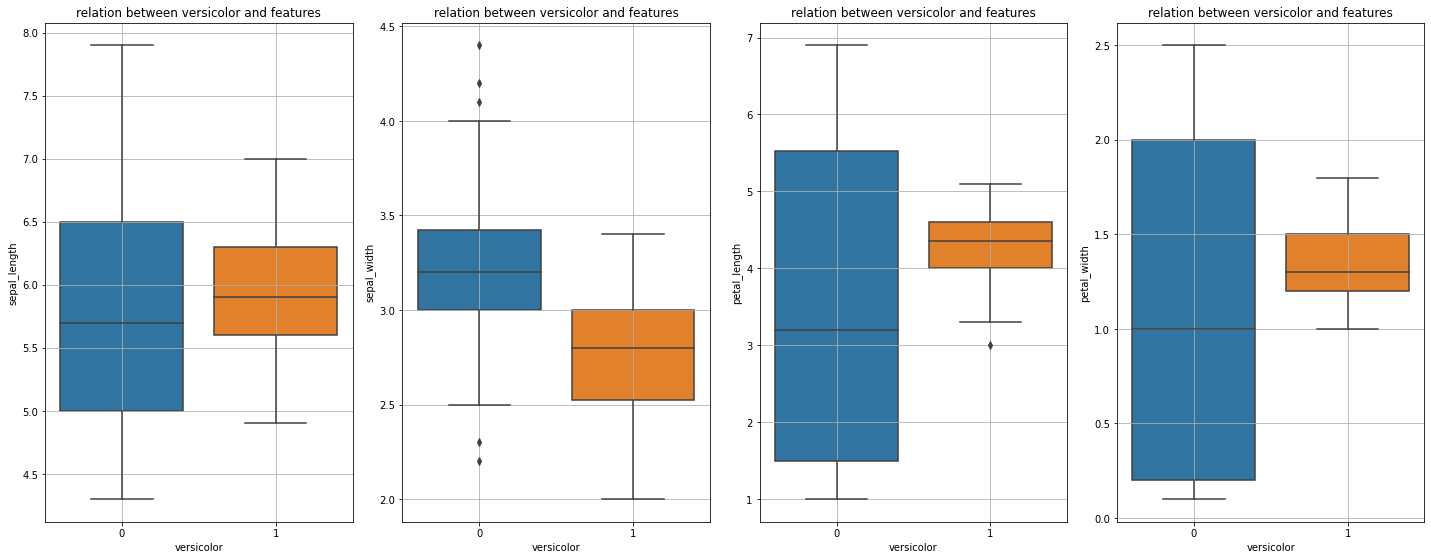

In [33]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.boxplot(data_1['versicolor'],data_1[col_1])
    plt.title('relation between versicolor and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

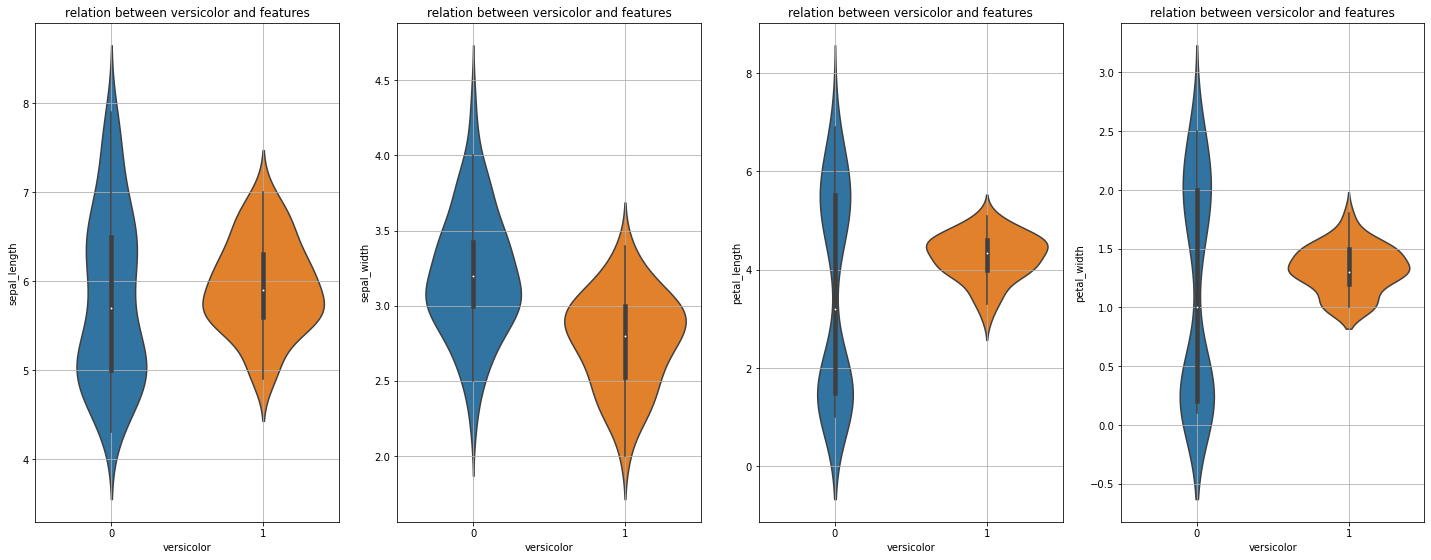

In [34]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.violinplot(data_1['versicolor'],data_1[col_1])
    plt.title('relation between versicolor and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

#### From above graphs its clear that versicolor is a meduim sized flower

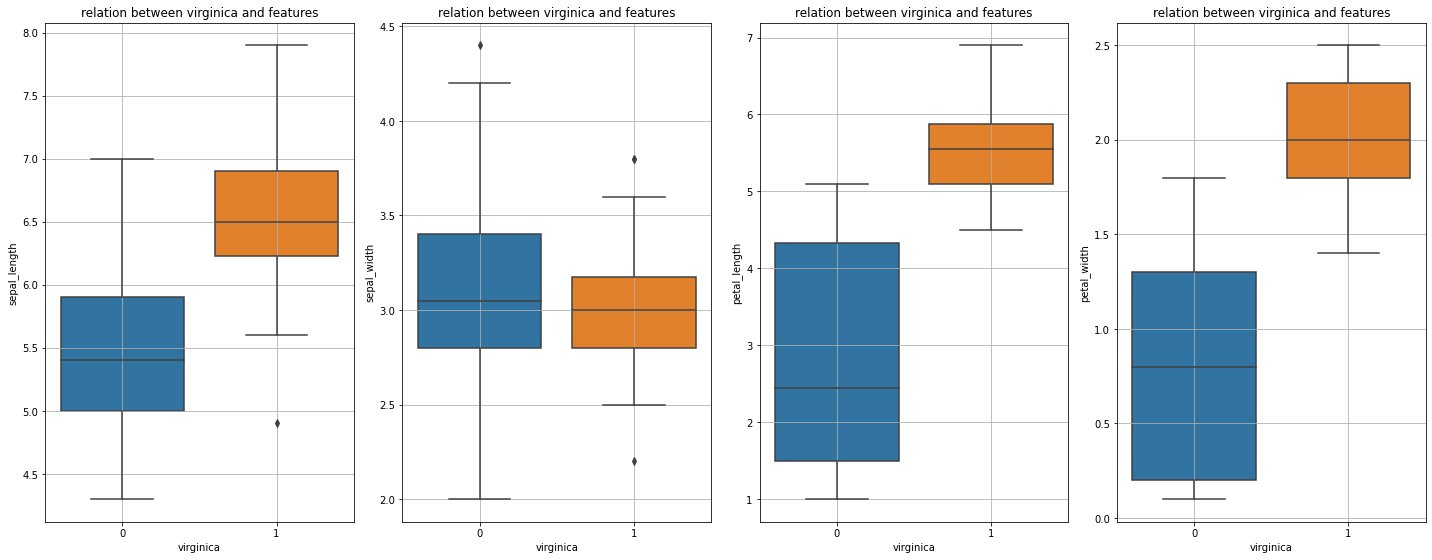

In [35]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.boxplot(data_1['virginica'],data_1[col_1])
    plt.title('relation between virginica and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

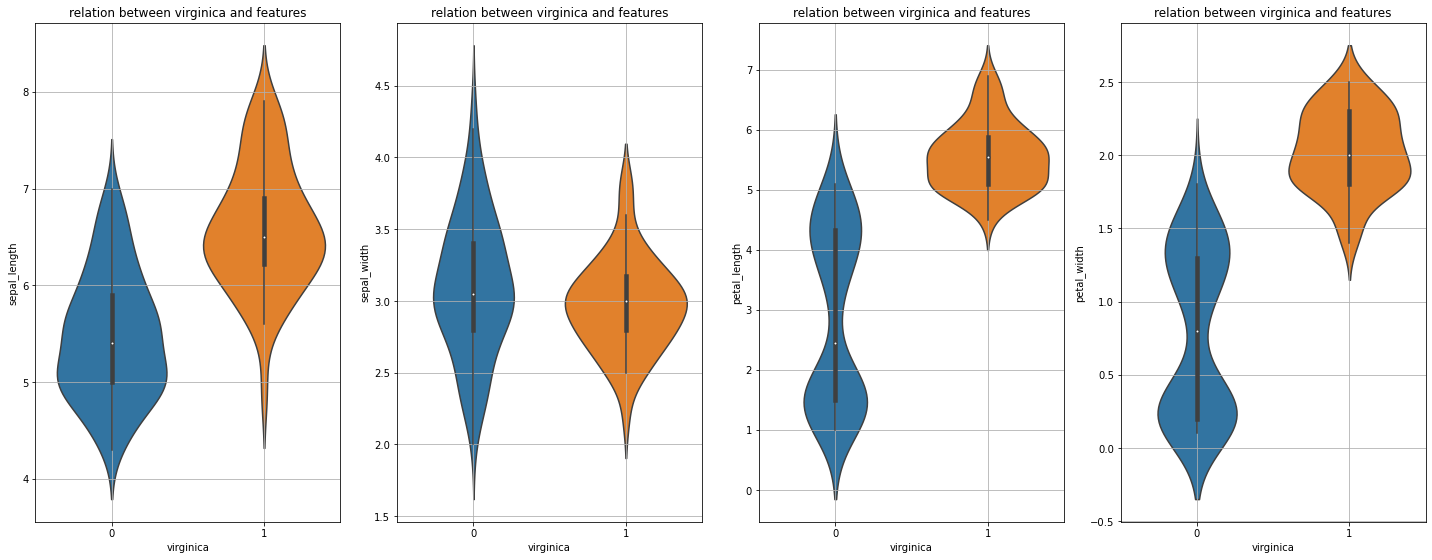

In [36]:
plt.figure(figsize=(20,30))
cols_1 = ['sepal_length','sepal_width','petal_length','petal_width']
i = 1
for col_1 in cols_1:
    plt.subplot(4,4,i)
    sns.violinplot(data_1['virginica'],data_1[col_1])
    plt.title('relation between virginica and features')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

#### From Above graphs we see that virginica is a large flower with large petals.

# Lets find some range of values of features by which we can classify species easily.

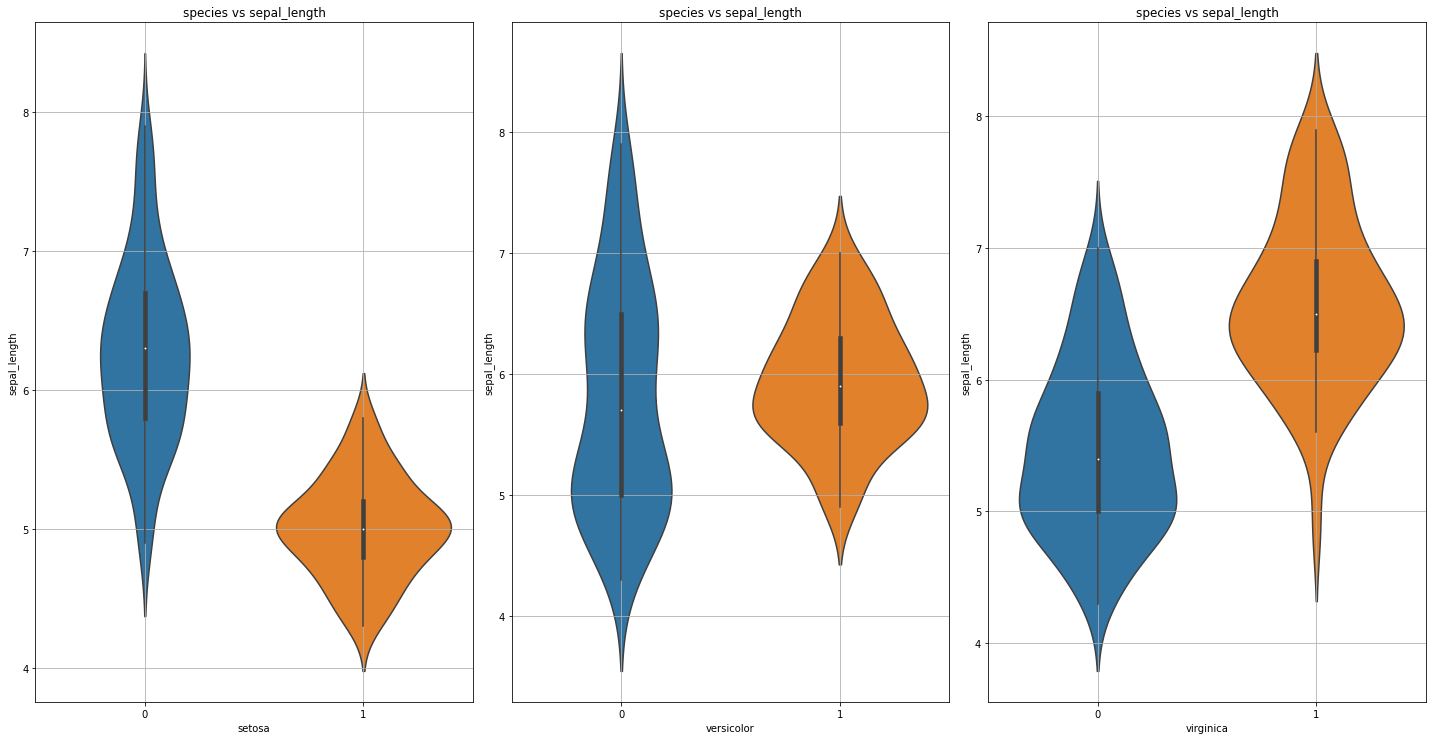

In [37]:
plt.figure(figsize=(20,30))
cols_2 = ['setosa','versicolor','virginica']
i = 1
for col_2 in cols_2:
    plt.subplot(3,3,i)
    sns.violinplot(data_1[col_2],data_1['sepal_length'])
    plt.title('species vs sepal_length')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

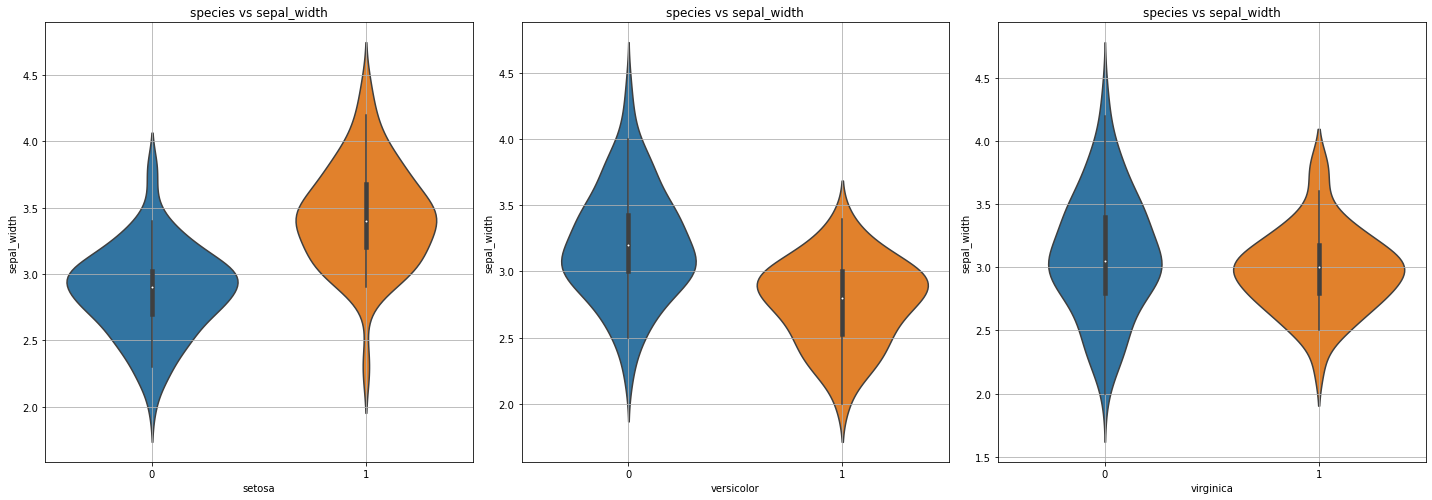

In [38]:
plt.figure(figsize=(20,20))
cols_2 = ['setosa','versicolor','virginica']
i = 1
for col_2 in cols_2:
    plt.subplot(3,3,i)
    sns.violinplot(data_1[col_2],data_1['sepal_width'])
    plt.title('species vs sepal_width')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

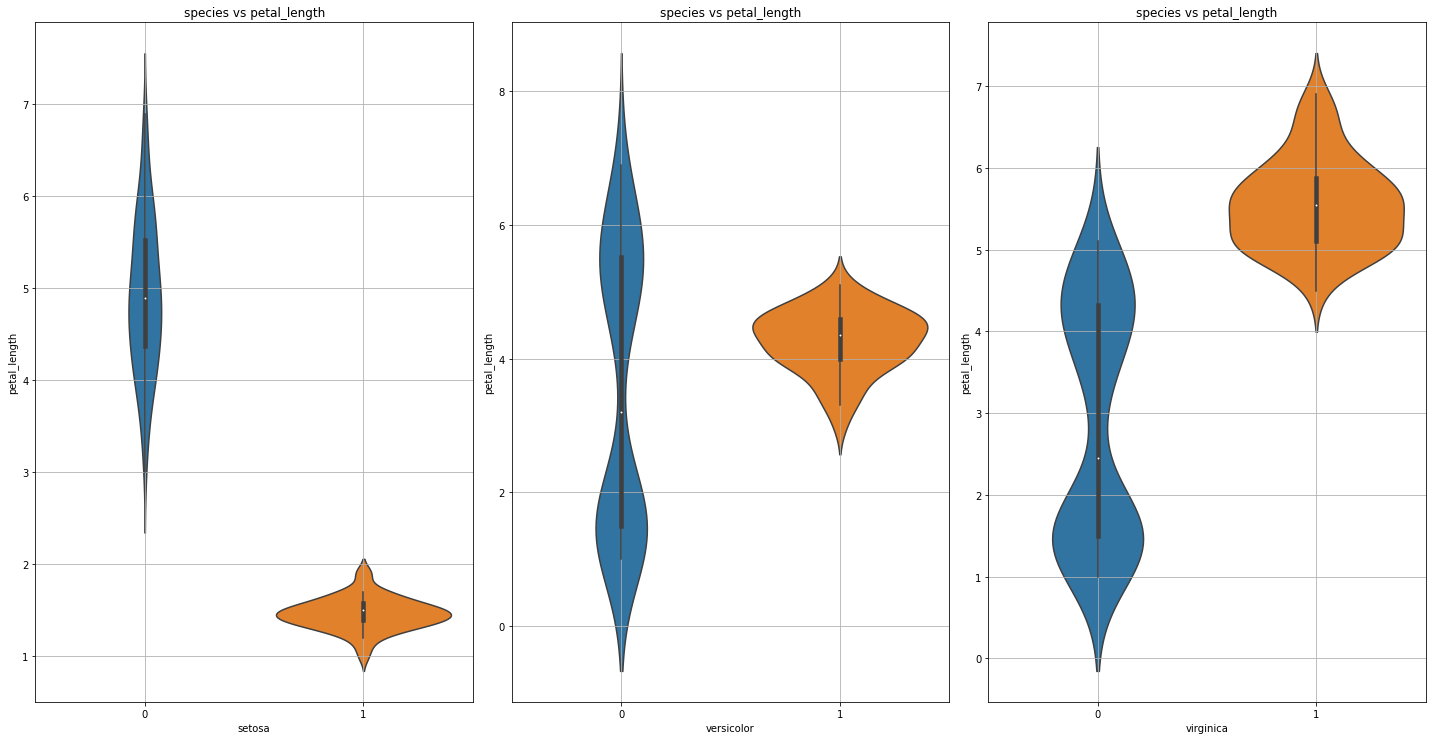

In [39]:
plt.figure(figsize=(20,30))
cols_2 = ['setosa','versicolor','virginica']
i = 1
for col_2 in cols_2:
    plt.subplot(3,3,i)
    sns.violinplot(data_1[col_2],data_1['petal_length'])
    plt.title('species vs petal_length')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

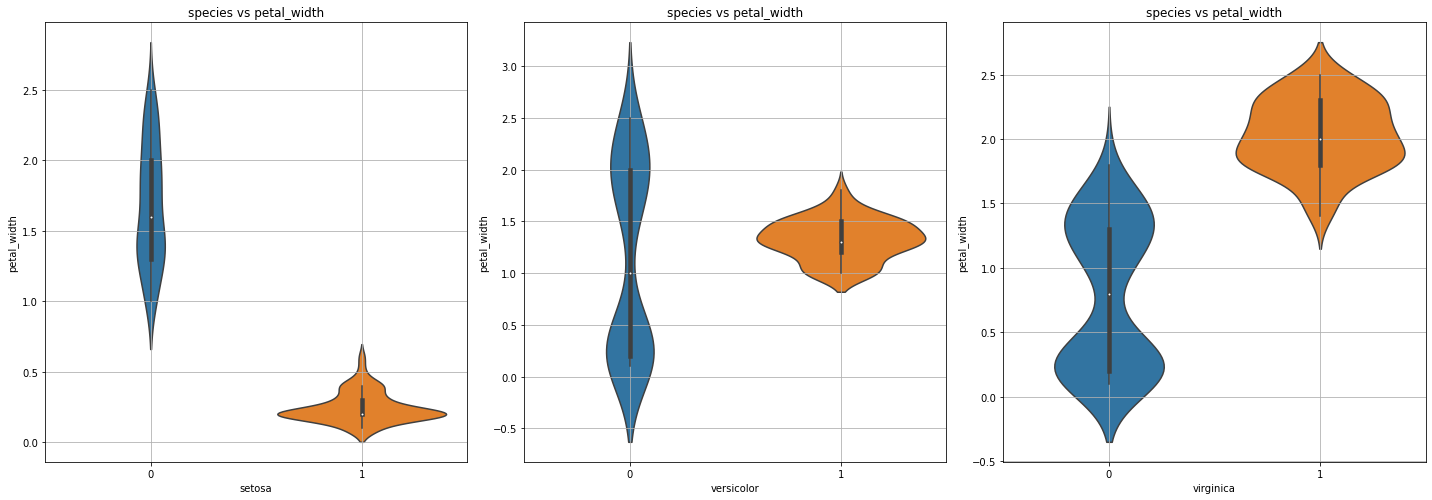

In [40]:
plt.figure(figsize=(20,20))
cols_2 = ['setosa','versicolor','virginica']
i = 1
for col_2 in cols_2:
    plt.subplot(3,3,i)
    sns.violinplot(data_1[col_2],data_1['petal_width'])
    plt.title('species vs petal_width')
    plt.grid()
    i = i+1
plt.tight_layout()    
plt.show()

## From above graphs we can assume that( below measures are in centimeters)
#### Setosa has(sepal_lenght(4.0 - 5.3),sepal_width(3.25 - 4.1),petal_length(0.9 - 2.1),petal-width(0.1 - 0.6))
#### versicolor has (sepal_length(5.2 - 6.5),sepal_width(2.3 - 3.0),petal_length(3.5 - 5.0),petal_width(1.1 - 1.6))
#### virginica has (sepal_lenght(6.0 - 7.0),sepal_width(2.6 - 3.3),petal_length(5.0 - 7.2),petal_width(1.6 - 2.7))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
x = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
x_train.shape

(105, 4)

In [45]:
x_test.shape

(45, 4)

In [46]:
y_train.shape

(105,)

In [47]:
y_test.shape

(45,)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
d_t = DecisionTreeClassifier()

In [50]:
model = d_t.fit(x_train,y_train)

In [51]:
y_pred = d_t.predict(x_test)

In [52]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy = accuracy_score(y_test,y_pred)

In [55]:
accuracy

0.9777777777777777

## Lets predict using our assumption.
#### lets enter value for setosa from its assumed range( 4.5,3.5,1.0,0.5)   We must get an output of [0] means setosa

In [56]:
model.predict([[4.5,3.5,1.0,0.5]])

array([0], dtype=int64)

#### lets enter value for versicolor from its assumed range( 5.5,2.5,4.0,1.3) We must get an output of [1] means versicolor

In [57]:
model.predict([[5.5,2.5,4.0,1.3]])

array([1], dtype=int64)

#### lets enter value for virginica from its assumed range(6.5,3.0,6.0,2.0) We must get an output of [2] means virginica

In [58]:
model.predict([[6.5,3.0,6.0,2.0]])

array([2], dtype=int64)